In [1]:
import numpy as np              # numpy is a general-purpose math package
import yt                       # yt is the data vizualization package
from yt.units import *          # this lets you get things like speed of light in proper units just by typing 'c'
from astropy.table import Table # this is needed for reading in various foggie data byproducts
from astropy.io import ascii    # this too
import matplotlib.pyplot as plt # this is the standard python plotting package, very useful!

# These imports are FOGGIE-specific files
from foggie.utils.consistency import *
from foggie.utils.foggie_load import *

In [2]:
### NEED TO CHANGE THESE BEFORE THIS SCRIPT WILL RUN!!!! ###
# Specify the paths to the code and the simulation output. I've left in my own paths, change them to yours!
# foggie_dir should be the path to the directory where you've placed the simulation output, the DD2427 folder.
foggie_dir = "/Users/hylee/foggie/foggie_sims/halo_008508/nref11c_nref9f/"
# code_path should be the path to the directory where you've cloned the github repo.
code_path = "/Users/hylee/coding/foggie/foggie/"
# Finally, this is the name of the simulation output.
snap = 'DD0138'

foggie_dir_output = "/Users/hylee/foggie/foggie_output/halo_008508/nref11c_nref9f/"


### END OF THINGS YOU NEED TO CHANGE ###


In [3]:
# These next two point to a specific place within the codebase. Leave these for now.
track_dir = code_path + 'halo_infos/008508/nref11c_nref9f/'
track_name = code_path + 'halo_tracks/008508/nref11n_selfshield_15/halo_track_200kpc_nref9'
# This puts together all the paths to get the full path to the simulation output that the code needs
snap_name = foggie_dir + snap + '/' + snap

# Now load in the simulation output. If you've looked at the yt documentation, you'll notice this looks
# very similar to the 'ds = yt.load(..)' step there. We wrote our own version of the load function
# designed just for FOGGIE, so you'll want to use this instead.
ds, refine_box = foggie_load(snap_name, track_name, halo_c_v_name=track_dir + 'halo_c_v',
                             disk_relative=False, do_filter_particles=False, masses_dir=track_dir)
# Now you have the full simulation dataset loaded into 'ds', and a small region of the dataset near
# the galaxy loaded into 'refine_box'.


Opening snapshot /Users/hylee/foggie/foggie_sims/halo_008508/nref11c_nref9f/DD0138/DD0138


yt : [INFO     ] 2023-07-14 16:03:28,463 Parameters: current_time              = 67.566527818285
yt : [INFO     ] 2023-07-14 16:03:28,464 Parameters: domain_dimensions         = [256 256 256]
yt : [INFO     ] 2023-07-14 16:03:28,465 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2023-07-14 16:03:28,466 Parameters: domain_right_edge         = [1. 1. 1.]
yt : [INFO     ] 2023-07-14 16:03:28,467 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2023-07-14 16:03:28,468 Parameters: current_redshift          = 4.2560468529995
yt : [INFO     ] 2023-07-14 16:03:28,468 Parameters: omega_lambda              = 0.715
yt : [INFO     ] 2023-07-14 16:03:28,469 Parameters: omega_matter              = 0.285
yt : [INFO     ] 2023-07-14 16:03:28,470 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2023-07-14 16:03:28,471 Parameters: hubble_constant           = 0.695


get_refine_box: using this location:     col1      col2     col3     col4     col5     col6     col7   col8
----------- -------- -------- -------- -------- -------- -------- ----
4.256046853 0.494908 0.492937 0.500048 0.496908 0.494937 0.502048    9


Parsing Hierarchy : 100%|█████████████████| 5116/5116 [00:00<00:00, 9597.39it/s]
yt : [INFO     ] 2023-07-14 16:03:29,274 Gathering a field list (this may take a moment.)


Pulling halo center from catalog file


yt : [INFO     ] 2023-07-14 16:03:42,749 Projection completed
yt : [INFO     ] 2023-07-14 16:03:42,752 xlim = 13435.798308 13635.798308
yt : [INFO     ] 2023-07-14 16:03:42,753 ylim = 13569.988005 13769.988005
yt : [INFO     ] 2023-07-14 16:03:42,755 xlim = 0.490803 0.498109
yt : [INFO     ] 2023-07-14 16:03:42,755 ylim = 0.495705 0.503011
yt : [INFO     ] 2023-07-14 16:03:42,760 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



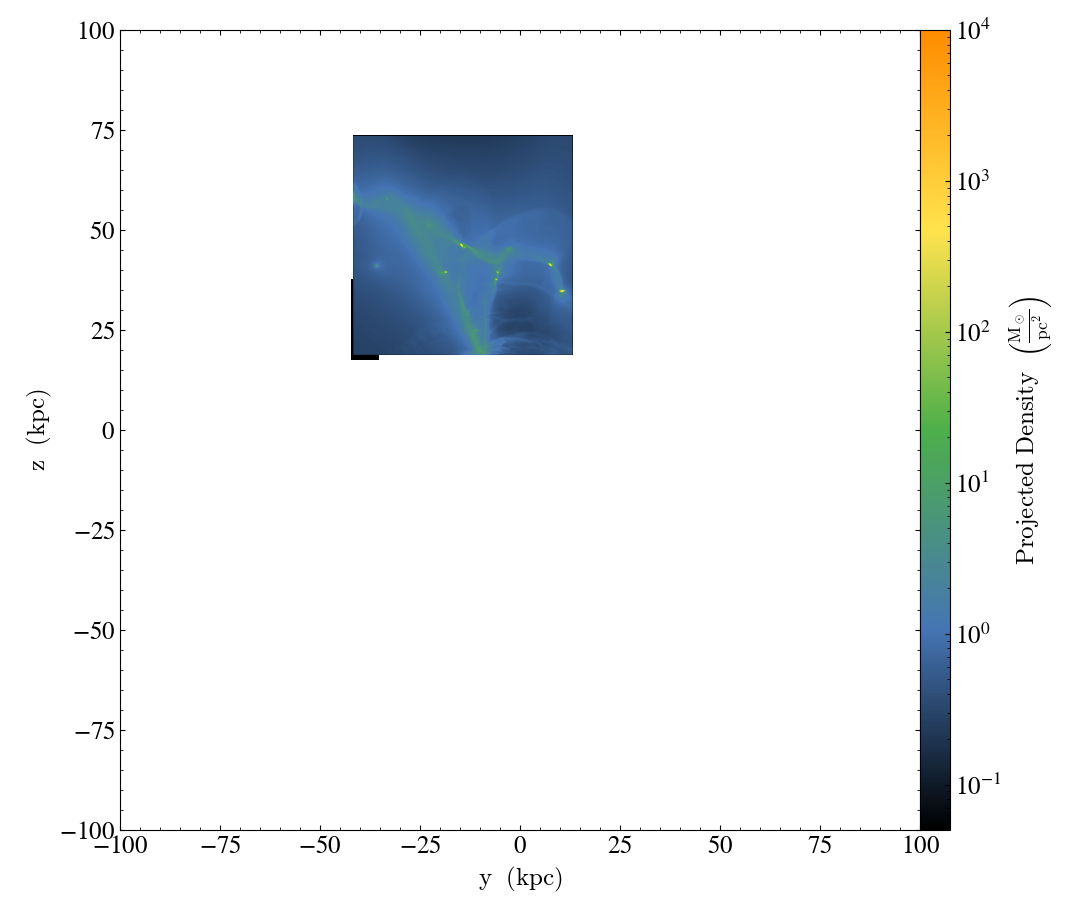

In [4]:
# We can plot the gas density in the simulation using yt's ProjectionPlot function:
proj = yt.ProjectionPlot(ds, "x", ('gas', 'density'), center=ds.halo_center_kpc, width=(200., 'kpc'), data_source=refine_box)
# This tells yt to make a projection of the field "density" in the x-direction, using the dataset 'ds',
# centered on 'ds.halo_center_kpc', with a width of the view window of 200 kiloparsecs, and to restrict
# what's plotted to only the subset of the dataset in 'refine_box'. 'ds.halo_center_kpc' is a variable
# that gives the location of the center of the galaxy. The whole simulation dataset is enormous,
# so you'll need that to find where the galaxy is to plot it! Try changing "x" to "y" or "z"
# instead to see the galaxy from different angles. Try changing the width from 200 to 100 or 50 to zoom in.

# With the projection plot made, we can now modify some things that will be useful to know.
proj.set_unit('density', 'Msun/pc**2')           # change the units of the density to solar masses per square parsec
proj.set_cmap('density', density_color_map)      # change the color map used
proj.set_zlim('density', density_proj_min, density_proj_max)  # change the minimum and maximum on the density scale
# In the above, 'density_color_map', 'density_proj_min', and 'density_proj_max' are all variables
# defined in foggie/utils/consistency.py. You can use them here because you imported it up above.

# Now let's save the plot so that we can look at it!
#proj.save(foggie_dir_output + snap + '/' + snap+ '_density_projection.png')
# You can put any filename you want, and even save as a .pdf or .jpg instead of .png.

yt : [INFO     ] 2023-07-14 16:03:47,234 Projection completed
yt : [INFO     ] 2023-07-14 16:03:47,235 xlim = 13619.988005 13719.988005
yt : [INFO     ] 2023-07-14 16:03:47,236 ylim = 13513.001745 13613.001745
yt : [INFO     ] 2023-07-14 16:03:47,237 xlim = 0.497532 0.501185
yt : [INFO     ] 2023-07-14 16:03:47,237 ylim = 0.493624 0.497276
yt : [INFO     ] 2023-07-14 16:03:47,239 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



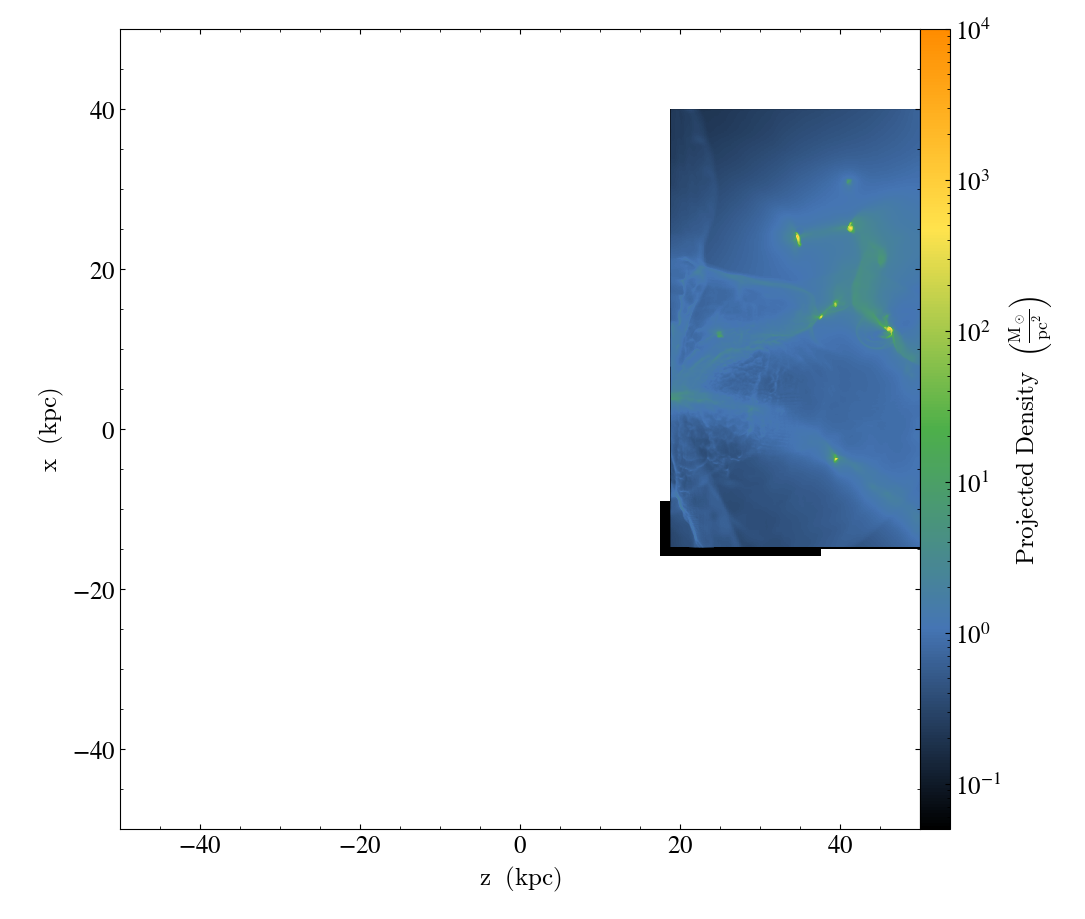

In [5]:
# We can plot the gas density in the simulation using yt's ProjectionPlot function:
proj = yt.ProjectionPlot(ds, "y", ('gas', 'density'), center=ds.halo_center_kpc, width=(100., 'kpc'), data_source=refine_box)
# This tells yt to make a projection of the field "density" in the x-direction, using the dataset 'ds',
# centered on 'ds.halo_center_kpc', with a width of the view window of 200 kiloparsecs, and to restrict
# what's plotted to only the subset of the dataset in 'refine_box'. 'ds.halo_center_kpc' is a variable
# that gives the location of the center of the galaxy. The whole simulation dataset is enormous,
# so you'll need that to find where the galaxy is to plot it! Try changing "x" to "y" or "z"
# instead to see the galaxy from different angles. Try changing the width from 200 to 100 or 50 to zoom in.

# With the projection plot made, we can now modify some things that will be useful to know.
proj.set_unit('density', 'Msun/pc**2')           # change the units of the density to solar masses per square parsec
proj.set_cmap('density', density_color_map)      # change the color map used
proj.set_zlim('density', density_proj_min, density_proj_max)

yt : [INFO     ] 2023-07-14 16:03:51,631 Projection completed
yt : [INFO     ] 2023-07-14 16:03:51,632 xlim = 13463.001745 13663.001745
yt : [INFO     ] 2023-07-14 16:03:51,633 ylim = 13435.798308 13635.798308
yt : [INFO     ] 2023-07-14 16:03:51,634 xlim = 0.491797 0.499103
yt : [INFO     ] 2023-07-14 16:03:51,634 ylim = 0.490803 0.498109
yt : [INFO     ] 2023-07-14 16:03:51,635 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



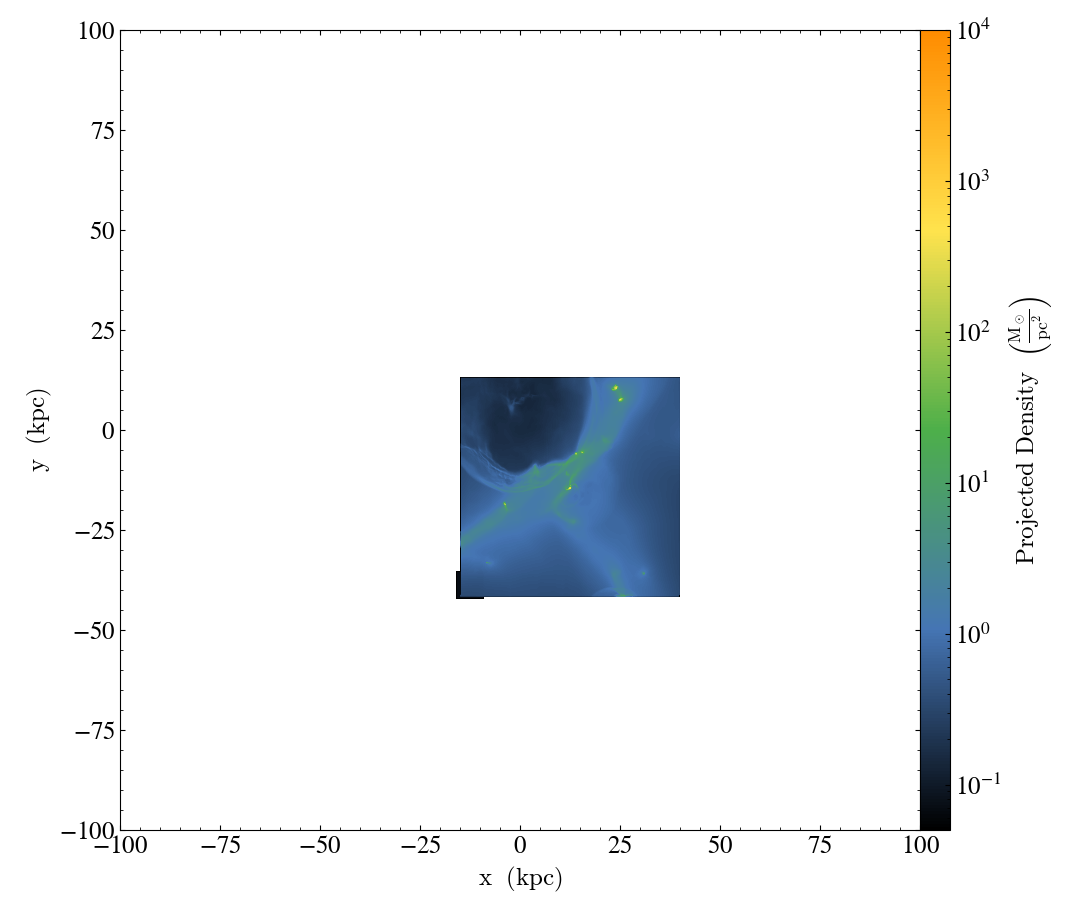

In [6]:
# We can plot the gas density in the simulation using yt's ProjectionPlot function:
proj = yt.ProjectionPlot(ds, "z", ('gas', 'density'), center=ds.halo_center_kpc, width=(200., 'kpc'), data_source=refine_box)
# This tells yt to make a projection of the field "density" in the x-direction, using the dataset 'ds',
# centered on 'ds.halo_center_kpc', with a width of the view window of 200 kiloparsecs, and to restrict
# what's plotted to only the subset of the dataset in 'refine_box'. 'ds.halo_center_kpc' is a variable
# that gives the location of the center of the galaxy. The whole simulation dataset is enormous,
# so you'll need that to find where the galaxy is to plot it! Try changing "x" to "y" or "z"
# instead to see the galaxy from different angles. Try changing the width from 200 to 100 or 50 to zoom in.

# With the projection plot made, we can now modify some things that will be useful to know.
proj.set_unit('density', 'Msun/pc**2')           # change the units of the density to solar masses per square parsec
proj.set_cmap('density', density_color_map)      # change the color map used
proj.set_zlim('density', density_proj_min, density_proj_max)

yt : [INFO     ] 2023-07-14 16:03:55,806 Projection completed
yt : [INFO     ] 2023-07-14 16:03:55,807 xlim = 13435.798308 13635.798308
yt : [INFO     ] 2023-07-14 16:03:55,807 ylim = 13569.988005 13769.988005
yt : [INFO     ] 2023-07-14 16:03:55,808 xlim = 0.490803 0.498109
yt : [INFO     ] 2023-07-14 16:03:55,809 ylim = 0.495705 0.503011
yt : [INFO     ] 2023-07-14 16:03:55,810 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



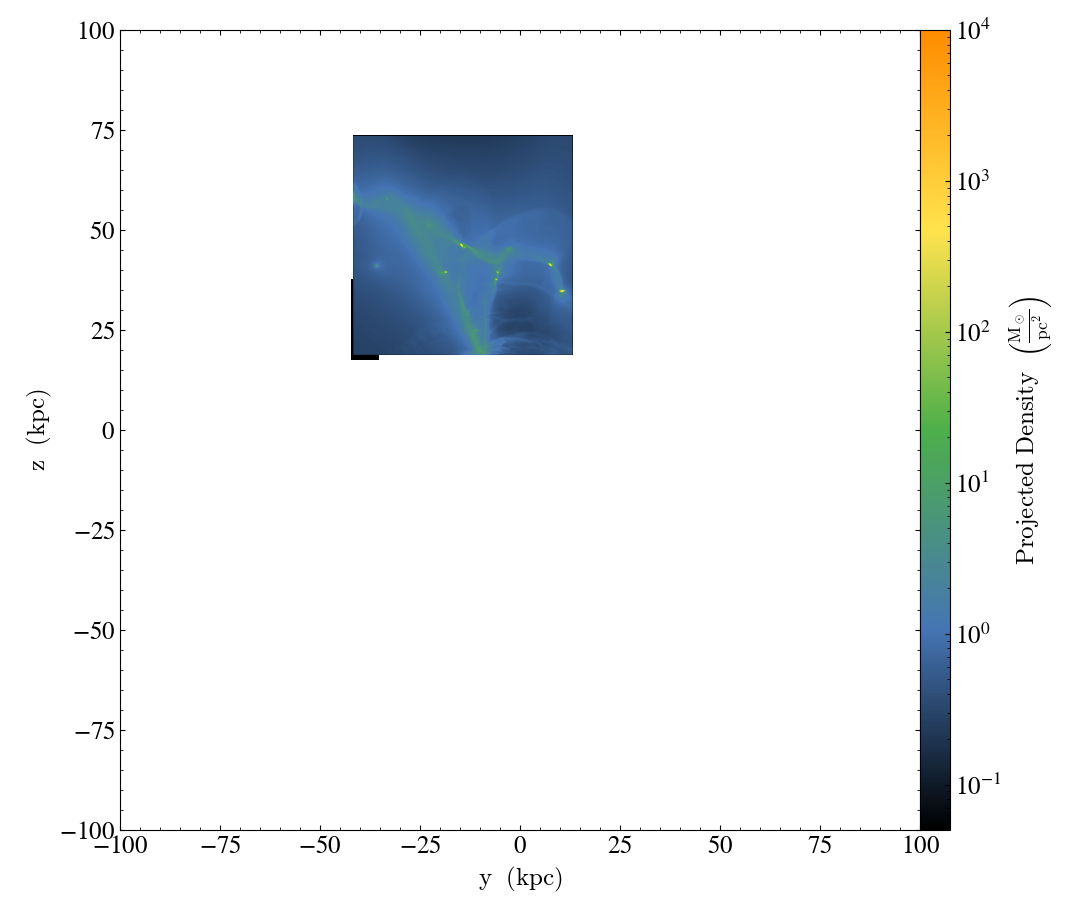

yt : [INFO     ] 2023-07-14 16:03:59,628 Projection completed
yt : [INFO     ] 2023-07-14 16:03:59,629 xlim = 13569.988005 13769.988005
yt : [INFO     ] 2023-07-14 16:03:59,629 ylim = 13463.001745 13663.001745
yt : [INFO     ] 2023-07-14 16:03:59,630 xlim = 0.495705 0.503011
yt : [INFO     ] 2023-07-14 16:03:59,631 ylim = 0.491797 0.499103
yt : [INFO     ] 2023-07-14 16:03:59,632 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



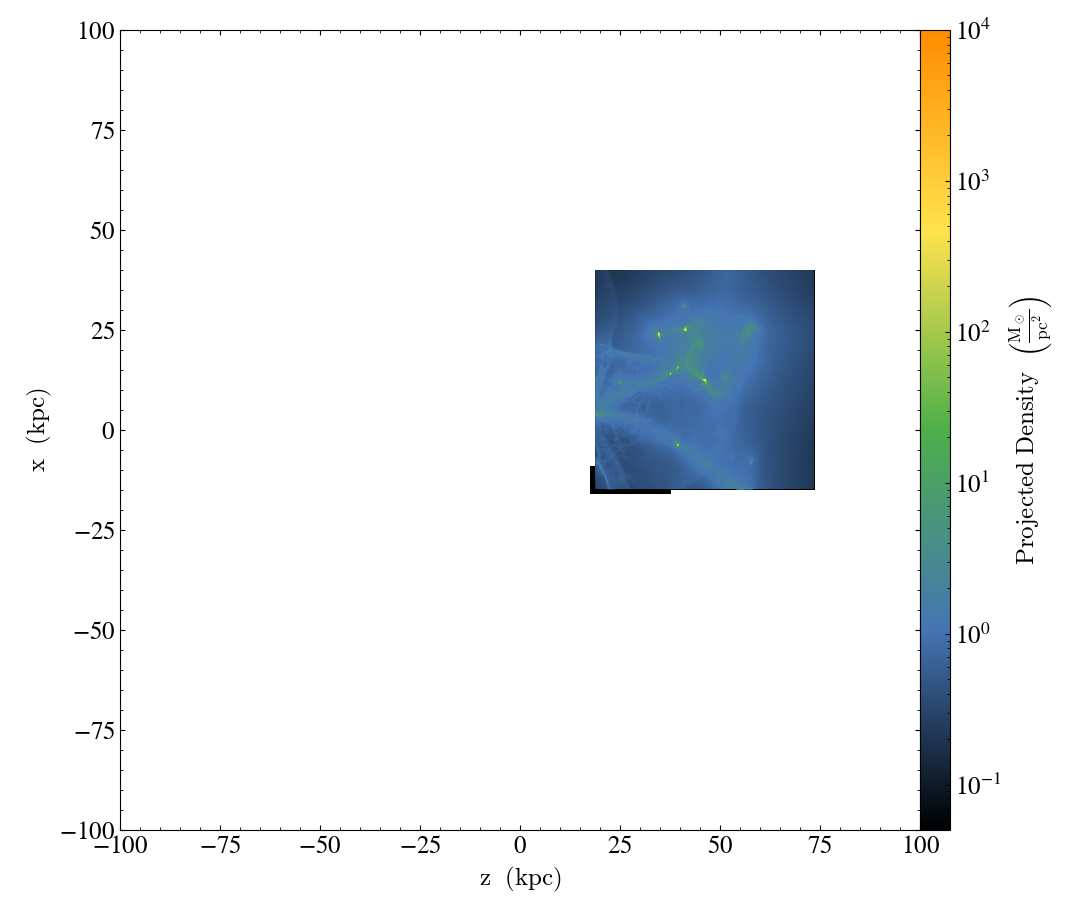

yt : [INFO     ] 2023-07-14 16:04:03,389 Projection completed
yt : [INFO     ] 2023-07-14 16:04:03,390 xlim = 13463.001745 13663.001745
yt : [INFO     ] 2023-07-14 16:04:03,391 ylim = 13435.798308 13635.798308
yt : [INFO     ] 2023-07-14 16:04:03,392 xlim = 0.491797 0.499103
yt : [INFO     ] 2023-07-14 16:04:03,392 ylim = 0.490803 0.498109
yt : [INFO     ] 2023-07-14 16:04:03,393 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



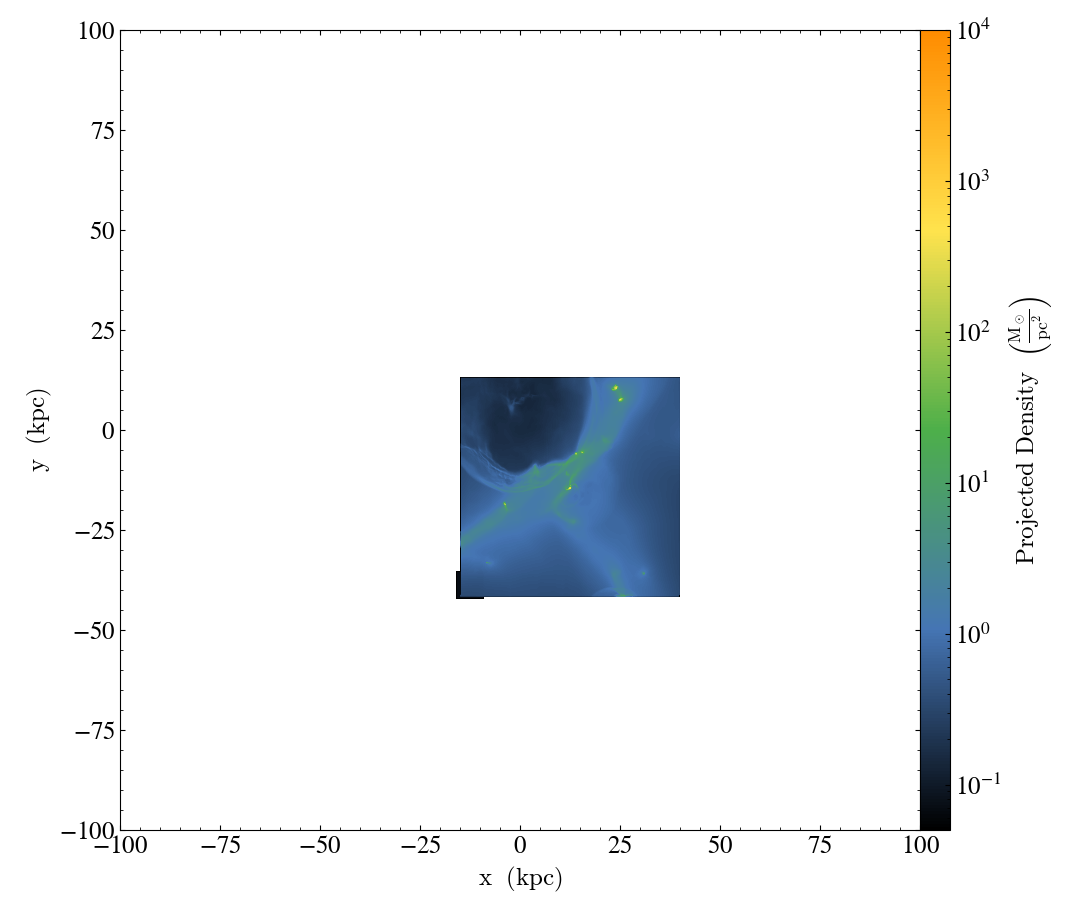

In [7]:
proj = yt.ProjectionPlot(ds, "x", ('gas', 'density'), center=ds.halo_center_kpc, width=(200., 'kpc'), data_source=refine_box)
proj.set_unit('density', 'Msun/pc**2')           # change the units of the density to solar masses per square parsec
proj.set_cmap('density', density_color_map)      # change the color map used
proj.set_zlim('density', density_proj_min, density_proj_max)
proj.show()

proj2 = yt.ProjectionPlot(ds, "y", ('gas', 'density'), center=ds.halo_center_kpc, width=(200., 'kpc'), data_source=refine_box)
proj2.set_unit('density', 'Msun/pc**2')           # change the units of the density to solar masses per square parsec
proj2.set_cmap('density', density_color_map)      # change the color map used
proj2.set_zlim('density', density_proj_min, density_proj_max)
proj2.show()

proj3 = yt.ProjectionPlot(ds, "z", ('gas', 'density'), center=ds.halo_center_kpc, width=(200., 'kpc'), data_source=refine_box)
proj3.set_unit('density', 'Msun/pc**2')           # change the units of the density to solar masses per square parsec
proj3.set_cmap('density', density_color_map)      # change the color map used
proj3.set_zlim('density', density_proj_min, density_proj_max)
proj3.show()



In [8]:
ds.derived_field_list # Gives the lists of all the fields inside the datasets 'ds' 

[('all', 'age'),
 ('all', 'creation_time'),
 ('all', 'dynamical_time'),
 ('all', 'mesh_id'),
 ('all', 'metallicity_fraction'),
 ('all', 'particle_angular_momentum'),
 ('all', 'particle_angular_momentum_magnitude'),
 ('all', 'particle_angular_momentum_x'),
 ('all', 'particle_angular_momentum_y'),
 ('all', 'particle_angular_momentum_z'),
 ('all', 'particle_index'),
 ('all', 'particle_mass'),
 ('all', 'particle_ones'),
 ('all', 'particle_position'),
 ('all', 'particle_position_cylindrical_radius'),
 ('all', 'particle_position_cylindrical_theta'),
 ('all', 'particle_position_cylindrical_z'),
 ('all', 'particle_position_relative_x'),
 ('all', 'particle_position_relative_y'),
 ('all', 'particle_position_relative_z'),
 ('all', 'particle_position_spherical_phi'),
 ('all', 'particle_position_spherical_radius'),
 ('all', 'particle_position_spherical_theta'),
 ('all', 'particle_position_x'),
 ('all', 'particle_position_y'),
 ('all', 'particle_position_z'),
 ('all', 'particle_radial_velocity'),
 (